# Fáza 1 (EDA)

Zdroje informácií o údajoch: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7219181/

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Profiles

Najskôr si načítame dáta z "profiles.csv" do data frame.

In [2]:
filename_p = "data/profiles.csv"
dfp = pd.read_csv(filename_p, sep='\t')
## separátorom dát je znak tabulátora

Počet záznamov:

In [ ]:
len(dfp)

Počet atribútov:

In [ ]:
len(dfp.columns.values)

Jednotlivé atribúty a ich typy:

In [ ]:
dfp.dtypes

In [ ]:
dfp[['blood_group', 'race', 'sex']].describe()

In [ ]:
sb.histplot(data=dfp['blood_group'])

In [ ]:
sb.histplot(data=dfp['race'])

In [ ]:
sb.histplot(data=dfp['sex'])


Overíme, či sa v dátach nevyskytujú NaN (chýbajúce hodnoty):

In [ ]:
dfp.isnull().sum()

Vypíšeme si začiatok dát. Už z výpisu atribútov bolo vidieť zvláštny stĺpec "Unnamed: 0".

In [ ]:
dfp.head()

Ako prvý problém vidíme nepotrebný index stĺpec s názvom "Unnamed: 0", ktorý môžme odstrániť.

In [ ]:
dfp.drop('Unnamed: 0', axis=1, inplace=True)
dfp.head()

Ďalší problém dát je nejednotný formát hodnôt v stĺpci "race":

In [ ]:
dfp.race.unique()

Po úprave sú hodnoty v konzistentnom formáte.

In [ ]:
dfp['race'] = dfp['race'].str.replace('white','White')
dfp['race'] = dfp['race'].str.replace('black','Black')
dfp['race'] = dfp['race'].str.replace('blsck','Black')
dfp.race.unique()

In [ ]:
dfp.groupby(['blood_group', 'sex']).size()        ## snudi pokus

Ako ďalší problém si môžeme všimnúť rôzne formáty dátumov v stĺpci "birthdate". Tieto dátumy preto upravíme na jednotný formát yy-mm-dd.

In [ ]:
dfp['birthdate'] = pd.to_datetime(dfp.birthdate)

dfp['birthdate'] = dfp['birthdate'].dt.strftime('%Y-%m-%d')
dfp.head()

In [ ]:
dfp[dfp['ssn'] == '157-32-2908']

## Labor

In [4]:
filename_l = "data/labor.csv"
dfl = pd.read_csv(filename_l, sep='\t')
dfl.head()

,Unnamed: 0,leukocyty,ssn,name,smoker,hemoglobin,trombocyty,indicator,alt,relationship,weight,ast,alp,hematokrit,hbver,etytr,er-cv,erytrocyty
0,0,5.90289,513-95-7625,Andrew Jacobs,no,7.54279,5.83096,1.0,17.60670,widowed,8.09544,42.92870,60.77098,6.50802,5.54259,6.57020,47.78400,5.46395
1,1,5.56403,025-71-2115,Ian Harrison,Y,7.87747,NaN,1.0,17.78037,single,73.58725,50.25507,47.14780,3.49169,3.52227,4.82276,55.62479,5.37924
2,2,6.24057,824-63-0108,Matthew Williams,no,4.72650,7.83234,1.0,25.25152,single,129.45079,25.15943,48.53570,8.65913,8.25976,5.64422,48.44629,6.52365
3,3,5.48374,157-32-2908,Charles Chavez,no,5.43079,5.36911,1.0,18.32802,divoced,18.61698,45.02094,73.77687,9.30190,6.26535,6.23014,50.48872,4.33766
4,4,6.04784,545-96-1267,Allen Chung MD,yes,8.85943,6.76682,1.0,11.03841,divoced,78.83355,59.06392,17.65112,4.47835,2.28488,7.83874,38.74892,5.17704


Počet záznamov:

In [ ]:
len(dfl)

Počet atribútov:

In [ ]:
len(dfl.columns.values)

Jednotlivé atribúty a ich typy:

In [ ]:
dfl.dtypes

In [ ]:
dfl[['weight', 'leukocyty', 'hemoglobin', 'trombocyty', 'alt', 'ast', 'alp', 'hematokrit', 'hbver', 'etytr', 
     'er-cv', 'erytrocyty']].describe()

Ako prvý problém znova vidíme nepotrebný index stĺpec s názvom "Unnamed: 0", ktorý môžeme odstrániť.

In [5]:
dfl.drop('Unnamed: 0', axis=1, inplace=True)
dfl.head()

,leukocyty,ssn,name,smoker,hemoglobin,trombocyty,indicator,alt,relationship,weight,ast,alp,hematokrit,hbver,etytr,er-cv,erytrocyty
0,5.90289,513-95-7625,Andrew Jacobs,no,7.54279,5.83096,1.0,17.60670,widowed,8.09544,42.92870,60.77098,6.50802,5.54259,6.57020,47.78400,5.46395
1,5.56403,025-71-2115,Ian Harrison,Y,7.87747,NaN,1.0,17.78037,single,73.58725,50.25507,47.14780,3.49169,3.52227,4.82276,55.62479,5.37924
2,6.24057,824-63-0108,Matthew Williams,no,4.72650,7.83234,1.0,25.25152,single,129.45079,25.15943,48.53570,8.65913,8.25976,5.64422,48.44629,6.52365
3,5.48374,157-32-2908,Charles Chavez,no,5.43079,5.36911,1.0,18.32802,divoced,18.61698,45.02094,73.77687,9.30190,6.26535,6.23014,50.48872,4.33766
4,6.04784,545-96-1267,Allen Chung MD,yes,8.85943,6.76682,1.0,11.03841,divoced,78.83355,59.06392,17.65112,4.47835,2.28488,7.83874,38.74892,5.17704


In [ ]:
len(dfl.drop_duplicates()) ## 99 duplicitnych zaznamov

In [6]:
dfl = dfl.drop_duplicates() ## odstranene duplicitne zaznamy
len(dfl)

9918

In [ ]:
sb.boxplot(data=dfl[['weight', 'alp']])

In [ ]:
sb.histplot(data=dfl['weight'])  ## co s tymto?

In [ ]:
dfl.isnull().sum()

In [ ]:
len(dfl[dfl.isnull().any(axis=1)])

In [ ]:
dfl.smoker.unique()

In [ ]:
len(dfl.loc[dfl['smoker'].isin(['Y', 'N'])])

In [ ]:
len(dfl.loc[dfl['smoker'].isin(['yes', 'no'])])

In [7]:
dfl['smoker'] = dfl['smoker'].str.replace('N','no')
dfl['smoker'] = dfl['smoker'].str.replace('Y','yes')
dfl.smoker.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
sb.histplot(data=dfl['alp']) ## su tieto data zle? co s nimi?

## Hypotézy

1. Pacienti potrebujúci ďalšie laboratórne vyšetrenie sú prevažne fajčiari.

In [14]:
dfl.groupby(['smoker', 'indicator']).size()

smoker  indicator
no      0.0          2125
        1.0          3747
yes     0.0          1398
        1.0          2648
dtype: int64

([<matplotlib.patches.Wedge at 0x194d6bf3100>,
 [Text(0.31370284974639834, 1.0543199334457207, 'Smokers'),
  Text(-0.3137028497463982, -1.0543199334457207, 'Non-smokers')])

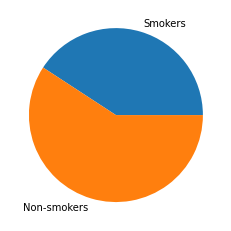

In [17]:
labels = ['Smokers', 'Non-smokers']
plt.pie([len(dfl[dfl['smoker'] == 'yes']), len(dfl[dfl['smoker'] == 'no'])], labels = labels)

([<matplotlib.patches.Wedge at 0x194d6c3f310>,
 [Text(-0.513114253894348, 0.9729921697785892, 'Smokers'),
  Text(0.5131142538943474, -0.9729921697785895, 'Non-smokers')])

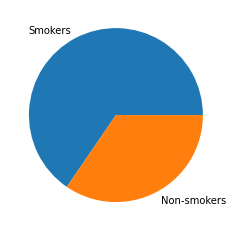

In [18]:
labels = ['Smokers', 'Non-smokers']
plt.pie([len(dfl[(dfl['smoker'] == 'yes') & (dfl['indicator'] == 1)]), len(dfl[(dfl['smoker'] == 'yes') & (dfl['indicator'] == 0)])], labels = labels)

([<matplotlib.patches.Wedge at 0x194d6c75400>,
 [Text(-0.4624489001704605, 0.9980686422942721, 'Smokers'),
  Text(0.46244890017046036, -0.9980686422942722, 'Non-smokers')])

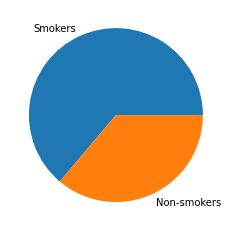

In [19]:
labels = ['Smokers', 'Non-smokers']
plt.pie([len(dfl[(dfl['smoker'] == 'no') & (dfl['indicator'] == 1)]), len(dfl[(dfl['smoker'] == 'no') & (dfl['indicator'] == 0)])], labels = labels)

2. Pacienti nevyžadujúci ďalšie laboratórne vyšetrenie majú vyšší počet trombocytov ako pacienti vyžadujúci ďalšie laboratórne vyšetrenia.

In [ ]:
dfl[dfl['indicator'] == 0]['hemoglobin'].mean()

In [ ]:
dfl[dfl['indicator'] == 1]['hemoglobin'].mean()

<AxesSubplot:ylabel='Density'>

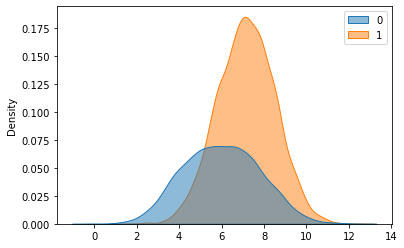

In [26]:
d = {'0': dfl[dfl['indicator'] == 0]['hemoglobin'], '1': dfl[dfl['indicator'] == 1]['hemoglobin']}
df = pd.DataFrame(data=d)
sb.kdeplot(data=df, fill = True, alpha = 0.5)

**Záver:** Hypotéza sa približne potvrdila?????